<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h3>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/SantoTome_final"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros<p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Carcavas_2011',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Tamaño archivos cargados: 1448 x 2082 



<p>Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1</p>

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr>
<h3>Tratamiento de datos</h3>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

datos = datos[datos['Arcillas'] >= 0]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Geologia'] != 0]
datos = datos[datos['Orientaciones'] >= 0]

print("Número de datos despues del tratamiento ", datos.size)

datos.Factor_LS = datos.Factor_LS.round(4) 


# Geología
datos.loc[datos.Geologia == 1, "Geologia"] = "Calizas"
datos.loc[datos.Geologia == 2, "Geologia"] = "Arenas"
datos.loc[datos.Geologia == 3, "Geologia"] = "Calcarenitas"
datos.loc[datos.Geologia == 4, "Geologia"] = "Margas"
datos.loc[datos.Geologia == 5, "Geologia"] = "Conglomerados"
datos.loc[datos.Geologia == 6, "Geologia"] = "Brechas"


# Usos del suelo
datos.loc[datos.Usos_Del_Suelo == 1, "Usos_Del_Suelo"] = "Tejido_urbano"
datos.loc[datos.Usos_Del_Suelo == 2, "Usos_Del_Suelo"] = "Labor_secano"
datos.loc[datos.Usos_Del_Suelo == 3, "Usos_Del_Suelo"] = "Olivares"
datos.loc[datos.Usos_Del_Suelo == 4, "Usos_Del_Suelo"] = "Mosaicos_cultivos"
datos.loc[datos.Usos_Del_Suelo == 5, "Usos_Del_Suelo"] = "Cursos_agua"

# Unidades edáficas
datos.loc[datos.Unidades_Edaficas == 44, "Unidades_Edaficas"] = "Cambisoles_RLR"
datos.loc[datos.Unidades_Edaficas == 48, "Unidades_Edaficas"] = "Cambisoles_RV"
datos.loc[datos.Unidades_Edaficas == 23, "Unidades_Edaficas"] = "Vertisoles_CCRV"
datos.loc[datos.Unidades_Edaficas == 22, "Unidades_Edaficas"] = "Vertisoles_PC"

Número de datos antes del tratamiento  63235347
Número de datos despues del tratamiento  33549159


<hr>
<h3>Proceso de visualización de datos</h3>

<hr>
<h3>Carcavas 2011</h3>

In [9]:
print(datos['Carcavas_2011'].value_counts())

0.0    1549571
1.0      48008
Name: Carcavas_2011, dtype: int64


<hr>
<h3>Altitud</h3>


In [10]:
print("Max: " , max(datos.Altitud))
print("Min: " , min(datos.Altitud))
print("Media: " , datos["Altitud"].mean())
print("STD: " , datos["Altitud"].std())

Max:  849.635009765625
Min:  426.97100830078125
Media:  598.3096617380315
STD:  85.70628316850662


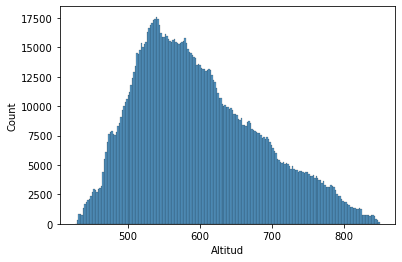

In [11]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>
<h3>Arcillas</h3>

In [12]:
print("Max: " , max(datos.Arcillas))
print("Min: " , min(datos.Arcillas))
print("Media: " , datos["Arcillas"].mean())
print("STD: " , datos["Arcillas"].std())

Max:  42.43583679199219
Min:  30.860118865966797
Media:  36.46192872893467
STD:  2.3749067282255516


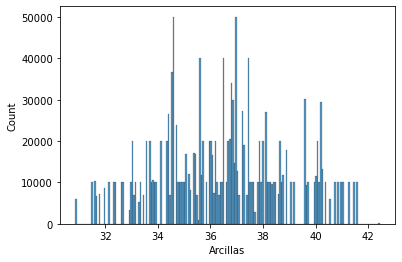

In [13]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>
<h3>Arenas</h3>

In [14]:
print("Max: " , max(datos.Arenas))
print("Min: " , min(datos.Arenas))
print("Media: " , datos["Arenas"].mean())
print("STD: " , datos["Arenas"].std())

Max:  33.87572479248047
Min:  9.730209350585938
Media:  18.92753133574727
STD:  4.124797778156603


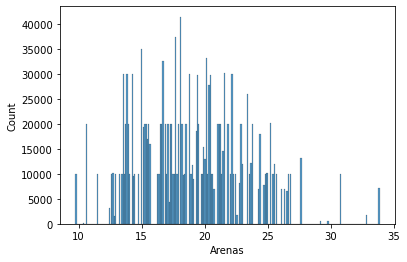

In [15]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>
<h3>Carbonatos</h3>


1.797754    1206040
0.788117     311817
1.539757      79722
Name: Carbonatos, dtype: int64


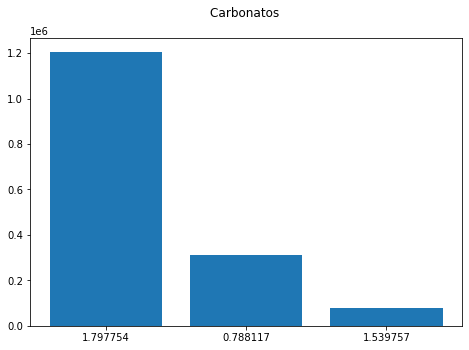

In [16]:
print(datos['Carbonatos'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['1.797754','0.788117','1.539757']
valores = [1206723,311394,79738]
ax.bar(langs, valores)
plt.title('Carbonatos \n')
plt.show()

<hr>
<h3>Carbono orgánico</h3>


In [17]:
print("Max: " , max(datos.Carbono_Organico))
print("Min: " , min(datos.Carbono_Organico))
print("Media: " , datos["Carbono_Organico"].mean())
print("STD: " , datos["Carbono_Organico"].std())

Max:  18.261516571044922
Min:  10.764988899230957
Media:  12.328858331136855
STD:  0.7096311952896374


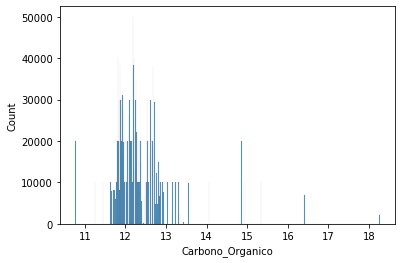

In [18]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>
<h3>Cárcavas</h3>

0.0    1552564
1.0      45015
Name: Carcavas, dtype: int64


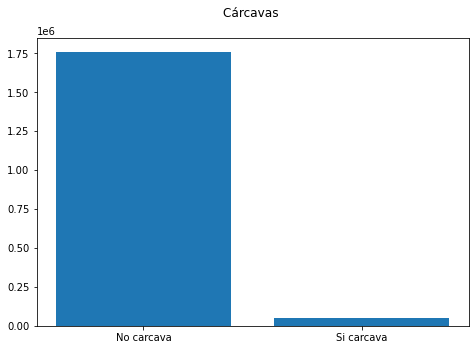

In [19]:
print(datos['Carcavas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['No carcava','Si carcava']
valores = [1760738, 48898]
ax.bar(langs, valores)
plt.title('Cárcavas \n')
plt.show()

<hr>
<h3>Curvatura perfil</h3>

In [20]:
print("Max: " , max(datos.Curvatura_Perfil))
print("Min: " , min(datos.Curvatura_Perfil))
print("Media: " , datos["Curvatura_Perfil"].mean())
print("STD: " , datos["Curvatura_Perfil"].std())

Max:  0.25045478343963623
Min:  -0.4562755525112152
Media:  3.3287882904997256e-05
STD:  0.015445143249971191


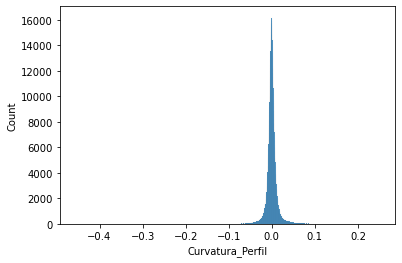

In [21]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

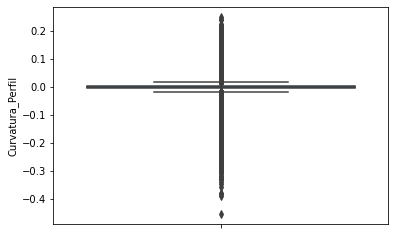

In [22]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

<hr>
<h3>Curvatura plana</h3>

In [23]:
print("Max: " , max(datos.Curvatura_Plana))
print("Min: " , min(datos.Curvatura_Plana))
print("Media: " , datos["Curvatura_Plana"].mean())
print("STD: " , datos["Curvatura_Plana"].std())

Max:  158.94403076171875
Min:  -82.95050811767578
Media:  -0.0010039624753355814
STD:  0.2105115942367468


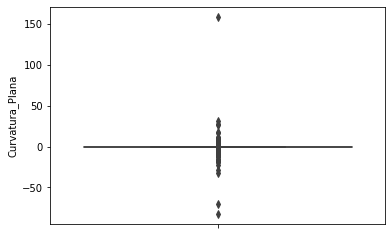

In [24]:
sns.boxplot( y=datos["Curvatura_Plana"])
plt.show()

In [25]:
print(datos.Curvatura_Plana.unique())

[-0.07923386 -0.12451447 -0.06756548 ...  0.05284742 -0.02737706
 -0.00318787]


<hr>
<h3>Distancia carreteras</h3>

In [26]:
print("Max: " , max(datos.Distancia_Carreteras))
print("Min: " , min(datos.Distancia_Carreteras))
print("Media: " , datos["Distancia_Carreteras"].mean())
print("STD: " , datos["Distancia_Carreteras"].std())

Max:  1709.334716796875
Min:  0.0
Media:  550.0684445265459
STD:  403.80764243807715


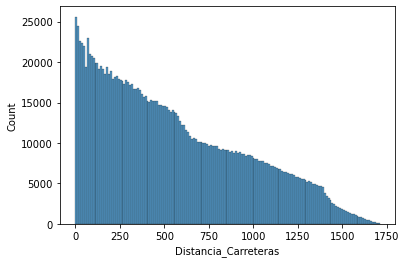

In [27]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>
<h3>Factor LS</h3>

<hr>
<h3>Geología</h3>

Margas           1394872
Arenas            122211
Calcarenitas       42838
Conglomerados      20408
Calizas            14326
Brechas             2924
Name: Geologia, dtype: int64


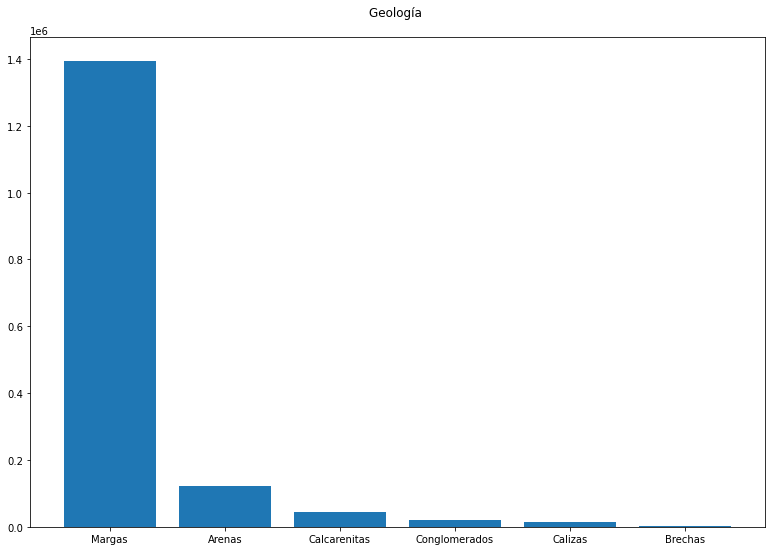

In [28]:
print(datos['Geologia'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Margas','Arenas', 'Calcarenitas', 'Conglomerados', 'Calizas', 'Brechas']
valores = [datos['Geologia'].value_counts().Margas, datos['Geologia'].value_counts().Arenas,
          datos['Geologia'].value_counts().Calcarenitas, datos['Geologia'].value_counts().Conglomerados,
          datos['Geologia'].value_counts().Calizas, datos['Geologia'].value_counts().Brechas]
ax.bar(langs, valores)
plt.title('Geología \n')
plt.show()

<hr>
<h3>Limos</h3>


In [29]:
print("Max: " , max(datos.Limos))
print("Min: " , min(datos.Limos))
print("Media: " , datos["Limos"].mean())
print("STD: " , datos["Limos"].std())

Max:  51.17815017700195
Min:  34.36614227294922
Media:  44.61053992680197
STD:  2.7918420663974906


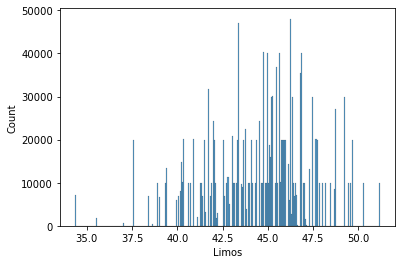

In [30]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>
<h3>Orientaciones</h3>

In [31]:
print("Max: " , max(datos.Orientaciones))
print("Min: " , min(datos.Orientaciones))
print("Media: " , datos["Orientaciones"].mean())
print("STD: " , datos["Orientaciones"].std())

Max:  359.9992980957031
Min:  0.000536986393854022
Media:  228.09694942012692
STD:  90.08001749717455


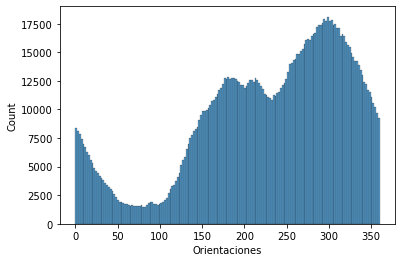

In [32]:
sns.histplot(data=datos, x="Orientaciones")
plt.show()

<hr>
<h3>Overland flow distance</h3>

In [33]:
print("Max: " , max(datos.Overland_Flow_Distance))
print("Min: " , min(datos.Overland_Flow_Distance))
print("Media: " , datos["Overland_Flow_Distance"].mean())
print("STD: " , datos["Overland_Flow_Distance"].std())

Max:  10095.7265625
Min:  0.0
Media:  3183.3161219531894
STD:  2064.403800533936


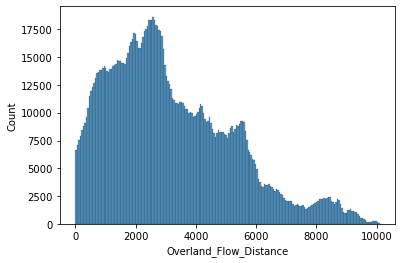

In [34]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>
<h3>Pendiente</h3>

In [35]:
print("Max: " , max(datos.Pendiente))
print("Min: " , min(datos.Pendiente))
print("Media: " , datos["Pendiente"].mean())
print("STD: " , datos["Pendiente"].std())

Max:  56.52096939086914
Min:  0.0
Media:  10.13992593970579
STD:  5.4327311036291155


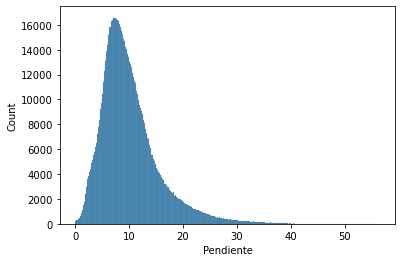

In [36]:
sns.histplot(data=datos, x="Pendiente")
plt.show()

<hr>
<h3>Stream_Power_Index</h3>

In [37]:
print("Max: " , max(datos.Stream_Power_Index))
print("Min: " , min(datos.Stream_Power_Index))
print("Media: " , datos["Stream_Power_Index"].mean())
print("STD: " , datos["Stream_Power_Index"].std())

Max:  551972864.0
Min:  -3720811520.0
Media:  -2320.1509959268615
STD:  3110425.837648533


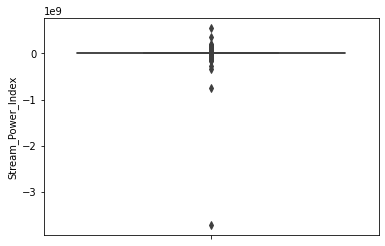

In [38]:
sns.boxplot(y=datos["Stream_Power_Index"])
plt.show()

<hr>
<h3>Topographic position index</h3>

In [39]:
print("Max: " , max(datos.Topographic_Position_Index))
print("Min: " , min(datos.Topographic_Position_Index))
print("Media: " , datos["Topographic_Position_Index"].mean())
print("STD: " , datos["Topographic_Position_Index"].std())

Max:  21.639244079589844
Min:  -26.37703514099121
Media:  0.035627994716283716
STD:  3.2232694686120977


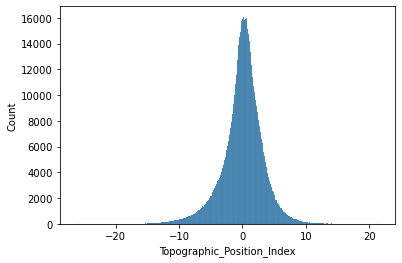

In [40]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h3>Topographic_Wetness_Index</h3>

In [41]:
print("Max: " , max(datos.Topographic_Wetness_Index))
print("Min: " , min(datos.Topographic_Wetness_Index))
print("Media: " , datos["Topographic_Wetness_Index"].mean())
print("STD: " , datos["Topographic_Wetness_Index"].std())

Max:  20.13279914855957
Min:  -10.7699556350708
Media:  9.704923027717253
STD:  3.797283376735175


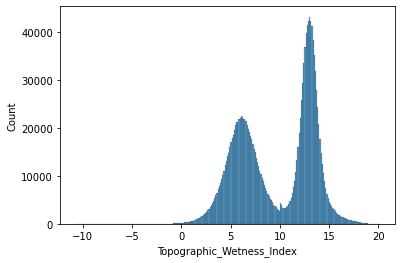

In [42]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>
<h3>Unidades edáficas</h3>

Cambisoles_RV      1049857
Cambisoles_RLR      488682
Vertisoles_PC        45845
Vertisoles_CCRV      13195
Name: Unidades_Edaficas, dtype: int64


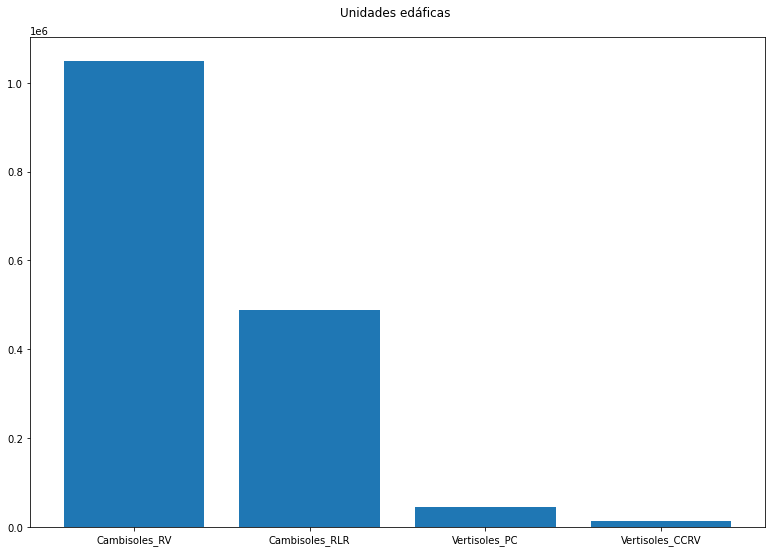

In [43]:
print(datos['Unidades_Edaficas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Cambisoles_RV','Cambisoles_RLR', 'Vertisoles_PC', 'Vertisoles_CCRV']
valores = [datos['Unidades_Edaficas'].value_counts().Cambisoles_RV, datos['Unidades_Edaficas'].value_counts().Cambisoles_RLR,
          datos['Unidades_Edaficas'].value_counts().Vertisoles_PC, datos['Unidades_Edaficas'].value_counts().Vertisoles_CCRV]
ax.bar(langs, valores)
plt.title('Unidades edáficas \n')
plt.show()

<hr>
<h3>Usos del suelo</h3>

Olivares             1518017
Labor_secano           52897
Mosaicos_cultivos      26665
Name: Usos_Del_Suelo, dtype: int64


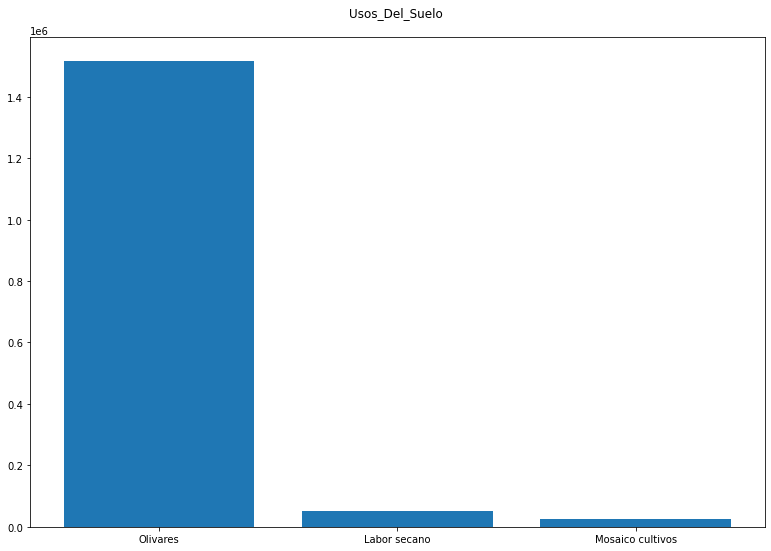

In [44]:
print(datos['Usos_Del_Suelo'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Olivares','Labor secano', 'Mosaico cultivos']
valores = [datos['Usos_Del_Suelo'].value_counts().Olivares, datos['Usos_Del_Suelo'].value_counts().Labor_secano,
          datos['Usos_Del_Suelo'].value_counts().Mosaicos_cultivos]
ax.bar(langs, valores)
plt.title('Usos_Del_Suelo \n')
plt.show()

<hr>
<h3>Matriz de correlación de variables</h3>

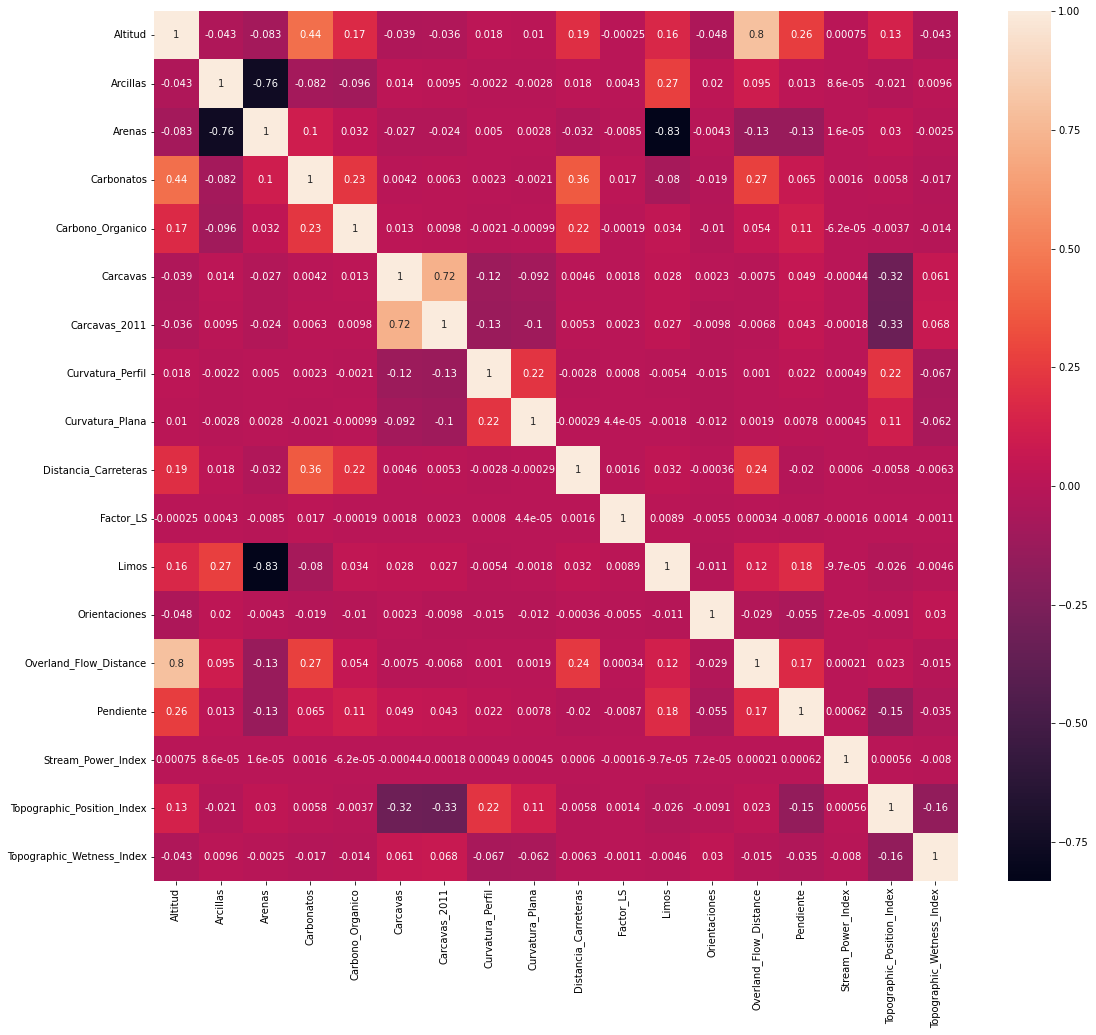

In [45]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()